In [118]:
%pylab inline
from parse_logs import build_df
import matplotlib.pyplot as plt
import numpy as np
import dateutil
plt.style.use('dark_background')
#plt.style.use('ggplot')


def print_groupby(groupby):
    for name, group in groupby:
        print('name: ' + str(name))
        print('group: ' + str(group))
        print('\n')

Populating the interactive namespace from numpy and matplotlib


C:\Users\NilsStrelow\projects\uni\bc\mongochain\benchmarks\venv\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['median', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [119]:
df = build_df('22nodes.log')
df['timestamp'] = [dateutil.parser.parse(x) for x in df['timestamp']]
consensus_df = df[(df.event_type == 'CLIENT_NEW_TRANSACTION') | (df.event_type == 'CLIENT_INTEGRATE_GLOBAL_RESULT')]
consensus_df = consensus_df.astype({
    'community_id': 'int',
    'content_hash': 'str',
    'event_type': 'str',
    'node_id': 'str',
    'node_type': 'str',
    'sequence_number': 'str',
    'timestamp': 'datetime64[ns]'})
consensus_time_group = consensus_df \
    .groupby(['content_hash', 'node_id', 'event_type'], as_index=True).agg({'timestamp': np.max})\
    .groupby(['content_hash', 'node_id'], as_index=True).timestamp
consensus_time = consensus_time_group \
    .diff() \
    .abs() \
    .dropna() \
    .reset_index()['timestamp'] \
    .rename('duration') \
    .apply(lambda x: x.total_seconds())
consensus_time


0    0.85
1    0.85
Name: duration, dtype: float64

Plot consensus time

Mean : 0.8500000000000001
Median : 0.8500000000000001


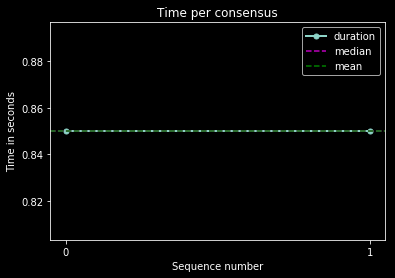

In [117]:
consensus_plot = consensus_time.plot(lw=2, marker='.', markersize=10, title='Time per consensus')
mean = consensus_time.mean()
median = consensus_time.median()
print("Mean : {0}".format(mean))
print("Median : {0}".format(median))
consensus_plot.axhline(median, color='m', linestyle='dashed', label='median')
consensus_plot.axhline(mean, color='g', linestyle='dashed', label='mean')
consensus_plot.set_ylabel('Time in seconds')
consensus_plot.set_xlabel('Sequence number')
consensus_plot.set_xticks(range(consensus_time.size))
consensus_plot.legend()